In [1]:
from fromscratchtoml.statistics import Statistics
from fromscratchtoml.toolbox import binary_visualize
import torch as ch

from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

In [2]:
n = 5
n_dim = 3
n_comp = n_dim

X = ch.zeros(n, n_dim)
if n_dim==3:
    m = 5
    c = 2
    d = 5
    for i in range(n):
        X[i,0] = i
        X[i,1] = m*i + c
        X[i,1] = np.sqrt(i)
        X[i,2] = (d - 2*X[i,0] - 3*X[i,1])/2

elif n_dim==2:
    for i in range(n):
        X[i,0] = i
        X[i,1] = 2*i

print(X)


 0.0000  0.0000  2.5000
 1.0000  1.0000  0.0000
 2.0000  1.4142 -1.6213
 3.0000  1.7321 -3.0981
 4.0000  2.0000 -4.5000
[torch.FloatTensor of size 5x3]



In [3]:
pca = PCA(n_components=n_comp)
pca.fit(X)
U, S, VT = np.linalg.svd(X - X.mean(0))

print(VT[:n_comp])
print(pca.components_)

[[ 0.48564243  0.23715405 -0.8413735 ]
 [-0.72722566  0.6436974  -0.2383201 ]
 [ 0.48507136  0.7276068   0.4850713 ]]
[[-0.48564244 -0.23715404  0.84137351]
 [-0.72722574  0.64369731 -0.23832016]
 [-0.48507127 -0.72760686 -0.48507126]]


In [4]:
r_x, evals, evecs = Statistics.pca(X, num_components=n_comp)

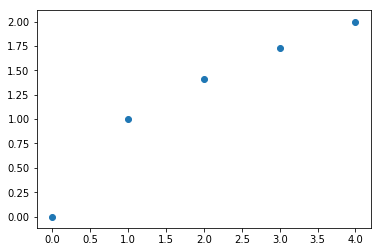

In [5]:
binary_visualize(X)

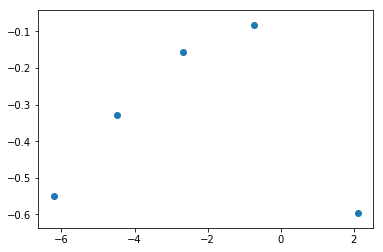

In [6]:
binary_visualize(ch.stack((r_x[...,0], r_x[...,1]), 1))

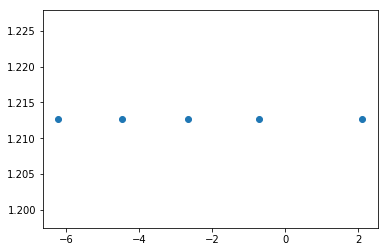

In [7]:
binary_visualize(ch.stack((r_x[...,0], r_x[...,2]), 1))

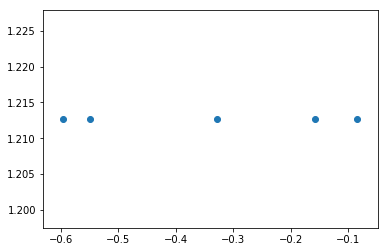

In [8]:
binary_visualize(ch.stack((r_x[...,1], r_x[...,2]), 1))

In [9]:
X = X.numpy()

In [10]:
pca = PCA(n_components=n_comp)
pca.fit(X)
skl_x = pca.transform(X)
print(skl_x)

[[ 4.4969459e+00 -2.5288945e-01 -3.5821438e-07]
 [ 1.6707153e+00  2.5938264e-01  6.0797760e-08]
 [-2.7729562e-01  1.8517843e-01  1.2819712e-07]
 [-2.0808179e+00  1.4484412e-02  1.7158564e-07]
 [-3.8095474e+00 -2.0615631e-01  2.3783207e-07]]


In [11]:
r_x


 2.1034 -0.5958  1.2127
-0.7228 -0.0835  1.2127
-2.6708 -0.1577  1.2127
-4.4743 -0.3284  1.2127
-6.2031 -0.5491  1.2127
[torch.FloatTensor of size 5x3]

In [17]:
Xhat = np.dot(skl_x, pca.components_) + X.mean(axis=0)
Xhatp = np.dot(r_x, evecs) #+ X.mean(axis=0)
print(Xhat)
print("")
print(Xhatp)

[[-2.3841858e-07 -4.7683716e-07  2.5000010e+00]
 [ 9.9999988e-01  9.9999982e-01  2.3841858e-07]
 [ 2.0000000e+00  1.4142135e+00 -1.6213204e+00]
 [ 3.0000000e+00  1.7320509e+00 -3.0980766e+00]
 [ 4.0000005e+00  2.0000002e+00 -4.5000005e+00]]

[[ 1.1244492e-08  5.8948501e-08  2.5000000e+00]
 [ 1.0000000e+00  1.0000000e+00 -2.4677156e-08]
 [ 2.0000000e+00  1.4142138e+00 -1.6213202e+00]
 [ 3.0000000e+00  1.7320508e+00 -3.0980759e+00]
 [ 4.0000000e+00  2.0000000e+00 -4.5000000e+00]]


In [13]:
X

array([[ 0.       ,  0.       ,  2.5      ],
       [ 1.       ,  1.       ,  0.       ],
       [ 2.       ,  1.4142135, -1.6213202],
       [ 3.       ,  1.7320508, -3.098076 ],
       [ 4.       ,  2.       , -4.5      ]], dtype=float32)

In [14]:
evecs


-0.4856 -0.2372  0.8414
-0.7272  0.6437 -0.2383
 0.4851  0.7276  0.4851
[torch.FloatTensor of size 3x3]

In [15]:
pca.components_

array([[-0.48564252, -0.23715413,  0.84137356],
       [-0.72722554,  0.6436977 , -0.23832   ],
       [-0.4850716 , -0.7276065 , -0.48507142]], dtype=float32)